<b>COSMIC RADIATION: deep learning</b>
    
rodrigoX: Contains 4 parameters
    1. NALLParticlesTotal : Total number of particles generated by the event in the ground level.
    2. MUTotal : Total number of muons.
    3. ELTotal : Total number of electromagnetic particles.
    4. Zenith : Zenith angle of the particle [degrees].
    5. Energy : Particle energy [GeV].

rodrigoY: contains the target
    Labels: photon, proton, helium, nitrogen, iron.
        the smallest number is assigned to photon (A=0) and the highest number to the heaviest particle, this is, iron (B=4).
        
        0==photon     1==proton    2==helium     3==nitrogen   4==iron 
     

In [1]:
# # To Save a session
# import dill
# import pickle
# dill.dump_session('notebook_env.db') #esto es de la forma normal,solo de la otra forma no funciona con tensoflow
# with open('basic_history.pickle', 'wb') as f:
#     pickle.dump(history.history, f)

In [2]:
# # To restore a session
# with open('basic_history.pickle', 'rb') as f:
#     history = pickle.load(f)#para cargar una variable
    
#dill.load_session('basic_history.pickle')

In [3]:
#Load it back:
model = tf.keras.models.load_model('cosmic_radiation.model')
#to save the model
#model.save('cosmic_radiation.model')

NameError: name 'tf' is not defined

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.layers import Dropout

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


Using TensorFlow backend.


### Data

In [6]:
#leave the dataset ready
df_x = pd.read_fwf('XRodrigo.txt')
df_x.columns = ["NALLParticlesTotal", "MUTotal", "ELTotal", "Zenith","Energy"]
df_y=pd.read_fwf('YRodrigo.txt')
df_y.columns = ["Particle"]

transpose=df_x.T
transpose_y=df_y.T #Transpose to put them together
df_tot = transpose.append(transpose_y)
df_tot=df_tot.T.sample(frac=1).reset_index(drop=True)#este el el df completo y barajado

df_y=df_tot[['Particle']]
df_x=df_tot[["NALLParticlesTotal", "MUTotal", "ELTotal", "Zenith","Energy"]]

In [7]:
#train-test split and reescale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, random_state=0,test_size = 0.25)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train_np=y_train.to_numpy()
y_test_np=y_test.to_numpy()

### Model 

In [12]:
from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.layers import Dropout

model = tf.keras.models.Sequential()

hidden_layers=5
for i in range(hidden_layers):
       
        model.add(tf.keras.layers.Dense(150, kernel_initializer='glorot_uniform', activation=tf.nn.relu))
        # model.add(BatchNormalization())    use_bias=False,
        # model.add(tf.keras.layers.Dropout(0.0))

model.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax))

# N_TRAIN=X_train.shape[0];BATCH_SIZE=128
# STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE
# lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay( 0.001,decay_steps=STEPS_PER_EPOCH*500,decay_rate=1,staircase=False)
# #STEPS_PER_EPOCH*300-->The code above sets a schedules.InverseTimeDecay to hyperbolically decrease the learning rate to 1/2 of the base rate at 300 epochs, 1/3 at 600 epochs and so on.

optimizer = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=optimizer , loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#If I want to know the weights of a layer:
#model.layers[1].get_weights()


In [13]:
%%time
history=model.fit(X_train, y_train_np, epochs=500, validation_data=(X_test, y_test))


Train on 31493 samples, validate on 10498 samples
Epoch 1/500
31493/31493 [==============================] - 3s 91us/sample - loss: 1.1558 - accuracy: 0.5321 - val_loss: 0.8212 - val_accuracy: 0.7462
Epoch 2/500
31493/31493 [==============================] - 3s 82us/sample - loss: 0.7201 - accuracy: 0.7497 - val_loss: 0.6362 - val_accuracy: 0.7269
Epoch 3/500
31493/31493 [==============================] - 3s 83us/sample - loss: 0.5936 - accuracy: 0.8032 - val_loss: 0.5434 - val_accuracy: 0.8559
Epoch 4/500
31493/31493 [==============================] - 3s 91us/sample - loss: 0.5147 - accuracy: 0.8327 - val_loss: 0.4961 - val_accuracy: 0.7790
Epoch 5/500
31493/31493 [==============================] - 3s 98us/sample - loss: 0.4581 - accuracy: 0.8476 - val_loss: 0.4045 - val_accuracy: 0.8902
Epoch 6/500
31493/31493 [==============================] - 3s 87us/sample - loss: 0.4144 - accuracy: 0.8553 - val_loss: 0.4385 - val_accuracy: 0.7804
Epoch 7/500
31493/31493 [=========================

Epoch 55/500
31493/31493 [==============================] - 3s 83us/sample - loss: 0.1727 - accuracy: 0.9255 - val_loss: 0.1393 - val_accuracy: 0.9340
Epoch 56/500
31493/31493 [==============================] - 2s 76us/sample - loss: 0.1642 - accuracy: 0.9297 - val_loss: 0.1695 - val_accuracy: 0.9268
Epoch 57/500
31493/31493 [==============================] - 2s 77us/sample - loss: 0.1780 - accuracy: 0.9268 - val_loss: 0.1461 - val_accuracy: 0.9371
Epoch 58/500
31493/31493 [==============================] - 3s 83us/sample - loss: 0.1567 - accuracy: 0.9341 - val_loss: 0.1271 - val_accuracy: 0.9568
Epoch 59/500
31493/31493 [==============================] - 2s 77us/sample - loss: 0.1687 - accuracy: 0.9267 - val_loss: 0.1351 - val_accuracy: 0.9349
Epoch 60/500
31493/31493 [==============================] - 2s 75us/sample - loss: 0.1561 - accuracy: 0.9339 - val_loss: 0.1978 - val_accuracy: 0.9010
Epoch 61/500
31493/31493 [==============================] - 3s 84us/sample - loss: 0.1579 - ac

Epoch 163/500
31493/31493 [==============================] - 2s 77us/sample - loss: 0.1224 - accuracy: 0.9490 - val_loss: 0.1004 - val_accuracy: 0.9556
Epoch 164/500
31493/31493 [==============================] - 2s 77us/sample - loss: 0.1069 - accuracy: 0.9521 - val_loss: 0.1037 - val_accuracy: 0.9468
Epoch 165/500
31493/31493 [==============================] - 2s 77us/sample - loss: 0.1327 - accuracy: 0.9422 - val_loss: 0.0936 - val_accuracy: 0.9601
Epoch 166/500
31493/31493 [==============================] - 2s 76us/sample - loss: 0.1029 - accuracy: 0.9542 - val_loss: 0.0953 - val_accuracy: 0.9590
Epoch 167/500
31493/31493 [==============================] - 3s 83us/sample - loss: 0.1145 - accuracy: 0.9520 - val_loss: 0.1190 - val_accuracy: 0.9431
Epoch 168/500
31493/31493 [==============================] - 2s 76us/sample - loss: 0.1057 - accuracy: 0.9523 - val_loss: 0.1051 - val_accuracy: 0.9534
Epoch 169/500
31493/31493 [==============================] - 2s 79us/sample - loss: 0.10

Epoch 217/500
31493/31493 [==============================] - 3s 86us/sample - loss: 0.1036 - accuracy: 0.9541 - val_loss: 0.1054 - val_accuracy: 0.9452
Epoch 218/500
31493/31493 [==============================] - 3s 95us/sample - loss: 0.0974 - accuracy: 0.9575 - val_loss: 0.0779 - val_accuracy: 0.9686
Epoch 219/500
31493/31493 [==============================] - 3s 95us/sample - loss: 0.1039 - accuracy: 0.9554 - val_loss: 0.1175 - val_accuracy: 0.9454
Epoch 220/500
31493/31493 [==============================] - 3s 87us/sample - loss: 0.1026 - accuracy: 0.9546 - val_loss: 0.0847 - val_accuracy: 0.9643
Epoch 221/500
31493/31493 [==============================] - 2s 78us/sample - loss: 0.1033 - accuracy: 0.9539 - val_loss: 0.2999 - val_accuracy: 0.8959
Epoch 222/500
31493/31493 [==============================] - 2s 78us/sample - loss: 0.1037 - accuracy: 0.9540 - val_loss: 0.0965 - val_accuracy: 0.9550
Epoch 223/500
31493/31493 [==============================] - 2s 79us/sample - loss: 0.09

Epoch 271/500
31493/31493 [==============================] - 3s 80us/sample - loss: 0.1042 - accuracy: 0.9535 - val_loss: 0.0786 - val_accuracy: 0.9682
Epoch 272/500
31493/31493 [==============================] - 2s 77us/sample - loss: 0.0975 - accuracy: 0.9558 - val_loss: 0.0825 - val_accuracy: 0.9648
Epoch 273/500
31493/31493 [==============================] - 2s 78us/sample - loss: 0.0946 - accuracy: 0.9587 - val_loss: 0.1171 - val_accuracy: 0.9389
Epoch 274/500
31493/31493 [==============================] - 2s 77us/sample - loss: 0.0943 - accuracy: 0.9569 - val_loss: 0.1014 - val_accuracy: 0.9493
Epoch 275/500
31493/31493 [==============================] - 3s 88us/sample - loss: 0.0976 - accuracy: 0.9573 - val_loss: 0.0824 - val_accuracy: 0.9638
Epoch 276/500
31493/31493 [==============================] - 3s 83us/sample - loss: 0.0957 - accuracy: 0.9569 - val_loss: 0.0889 - val_accuracy: 0.9539
Epoch 277/500
31493/31493 [==============================] - 2s 77us/sample - loss: 0.09

Epoch 325/500
31493/31493 [==============================] - 3s 80us/sample - loss: 0.0903 - accuracy: 0.9597 - val_loss: 0.1206 - val_accuracy: 0.9405
Epoch 326/500
31493/31493 [==============================] - 2s 77us/sample - loss: 0.0913 - accuracy: 0.9595 - val_loss: 0.0818 - val_accuracy: 0.9619
Epoch 327/500
31493/31493 [==============================] - 2s 79us/sample - loss: 0.0848 - accuracy: 0.9616 - val_loss: 0.2074 - val_accuracy: 0.9168
Epoch 328/500
31493/31493 [==============================] - 2s 78us/sample - loss: 0.0930 - accuracy: 0.9579 - val_loss: 0.0781 - val_accuracy: 0.9651
Epoch 329/500
31493/31493 [==============================] - 3s 81us/sample - loss: 0.0899 - accuracy: 0.9593 - val_loss: 0.0705 - val_accuracy: 0.9703
Epoch 330/500
31493/31493 [==============================] - 3s 80us/sample - loss: 0.0921 - accuracy: 0.9595 - val_loss: 0.1975 - val_accuracy: 0.9136
Epoch 331/500
31493/31493 [==============================] - 3s 82us/sample - loss: 0.09

Epoch 379/500
31493/31493 [==============================] - 3s 90us/sample - loss: 0.0893 - accuracy: 0.9608 - val_loss: 0.0711 - val_accuracy: 0.9693
Epoch 380/500
31493/31493 [==============================] - 3s 89us/sample - loss: 0.0841 - accuracy: 0.9617 - val_loss: 0.0740 - val_accuracy: 0.9677
Epoch 381/500
31493/31493 [==============================] - 3s 90us/sample - loss: 0.0876 - accuracy: 0.9601 - val_loss: 0.0742 - val_accuracy: 0.9682
Epoch 382/500
31493/31493 [==============================] - 3s 82us/sample - loss: 0.0874 - accuracy: 0.9615 - val_loss: 0.0730 - val_accuracy: 0.9665
Epoch 383/500
31493/31493 [==============================] - 3s 79us/sample - loss: 0.0827 - accuracy: 0.9640 - val_loss: 0.0913 - val_accuracy: 0.9574
Epoch 384/500
31493/31493 [==============================] - 3s 83us/sample - loss: 0.0816 - accuracy: 0.9637 - val_loss: 0.0887 - val_accuracy: 0.9548
Epoch 385/500
31493/31493 [==============================] - 2s 78us/sample - loss: 0.09

Epoch 433/500
31493/31493 [==============================] - 3s 83us/sample - loss: 0.0828 - accuracy: 0.9645 - val_loss: 0.1207 - val_accuracy: 0.9563
Epoch 434/500
31493/31493 [==============================] - 3s 85us/sample - loss: 0.0796 - accuracy: 0.9651 - val_loss: 0.1475 - val_accuracy: 0.9337
Epoch 435/500
31493/31493 [==============================] - 2s 77us/sample - loss: 0.0833 - accuracy: 0.9634 - val_loss: 0.0687 - val_accuracy: 0.9709
Epoch 436/500
31493/31493 [==============================] - 2s 77us/sample - loss: 0.0769 - accuracy: 0.9662 - val_loss: 0.0869 - val_accuracy: 0.9558
Epoch 437/500
31493/31493 [==============================] - 3s 80us/sample - loss: 0.0799 - accuracy: 0.9640 - val_loss: 0.0684 - val_accuracy: 0.9691
Epoch 438/500
31493/31493 [==============================] - 2s 77us/sample - loss: 0.0840 - accuracy: 0.9617 - val_loss: 0.0948 - val_accuracy: 0.9556
Epoch 439/500
31493/31493 [==============================] - 2s 78us/sample - loss: 0.08

Epoch 487/500
31493/31493 [==============================] - 2s 79us/sample - loss: 0.0831 - accuracy: 0.9625 - val_loss: 0.0709 - val_accuracy: 0.9696
Epoch 488/500
31493/31493 [==============================] - 2s 77us/sample - loss: 0.0819 - accuracy: 0.9628 - val_loss: 0.0674 - val_accuracy: 0.9709
Epoch 489/500
31493/31493 [==============================] - 3s 89us/sample - loss: 0.0762 - accuracy: 0.9667 - val_loss: 0.0993 - val_accuracy: 0.9522
Epoch 490/500
31493/31493 [==============================] - 3s 86us/sample - loss: 0.0803 - accuracy: 0.9644 - val_loss: 0.0766 - val_accuracy: 0.9663
Epoch 491/500
31493/31493 [==============================] - 2s 78us/sample - loss: 0.0809 - accuracy: 0.9643 - val_loss: 0.0712 - val_accuracy: 0.9666
Epoch 492/500
31493/31493 [==============================] - 2s 77us/sample - loss: 0.0825 - accuracy: 0.9628 - val_loss: 0.0710 - val_accuracy: 0.9691
Epoch 493/500
31493/31493 [==============================] - 3s 83us/sample - loss: 0.08

In [1]:
# 150 neuronas, adam, he unifrom, dropout 0, batch 128, lr=0.001: 0.9651,0.9649

# con nadam hay demasiado ruido, asi que lo descarto

# 150 neuronas, adam, GLOROT unifrom, dropout 0, batch 128, lr=0.001: 0.9676,0.9713

# 250 neuronas, adam, GLOROT unifrom, dropout 0, batch 128, lr=0.001: 0.9630,0.9685
# 150 neuronas, adam, GLOROT unifrom, dropout 0.1, batch 0, lr=0.001: 0.95,0.94
# 150 neuronas, adam, GLOROT unifrom, dropout 0, batch 128, lr=0.0001: 0.9649,0.9631

In [15]:
val_loss, val_acc = model.evaluate(X_test, y_test_np)
# print(val_loss)
print(val_acc)
#model.summary()
#model.get_config()
#model.get_weights()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred= model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

10498/10498 [==============================] - 0s 33us/sample - loss: 0.0757 - accuracy: 0.9631
0.96313584
[[2108    9    6    0    0]
 [   0 2086   40    8   10]
 [   0    5 1911  128   29]
 [   0    0   55 1916   87]
 [   0    0    4    6 2090]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2123
         1.0       0.99      0.97      0.98      2144
         2.0       0.95      0.92      0.93      2073
         3.0       0.93      0.93      0.93      2058
         4.0       0.94      1.00      0.97      2100

    accuracy                           0.96     10498
   macro avg       0.96      0.96      0.96     10498
weighted avg       0.96      0.96      0.96     10498

0.9631358353972185


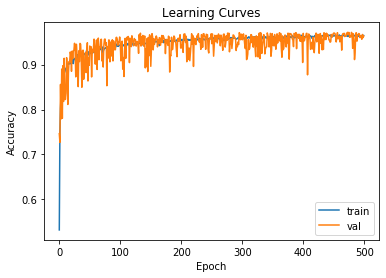

In [24]:
history1=history
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='val')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

### Grid Search

In [8]:
#Shouls chage
import numpy
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [9]:
def create_model(hidden_layers=3,neurons=128,optimizer='adam',learn_rate=0.001, init_mode='he_normal', activation='relu', dropout_rate=0.0, weight_constraint=0):#parameters here are default
    #create model
    model = tf.keras.models.Sequential()
    #los weight_initializer son mas optimos dependiendo de la funcion de activacion
    
    for i in range(hidden_layers):
        model.add(tf.keras.layers.Dense(neurons, kernel_initializer=init_mode, activation=activation))
        #     model.add(BatchNormalization())     , use_bias=False
        #     model.add(tf.keras.layers.Dropout(dropout_rate))
    
    model.add(tf.keras.layers.Dense(5, activation='softmax'))
    
    #aqui estoy obligando a que el optimizer sea adam. Deberia decir: if optimizer=='adam' then... y hacerlo para otros optimizadores
    #optimizer = tf.keras.optimizers.Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
    #compile model        https://keras.io/models/model/
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


In [10]:
history=model.fit(X_train, y_train_np, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Train on 31493 samples, validate on 10498 samples
Epoch 1/5
31493/31493 [==============================] - 1s 43us/sample - loss: 1.1172 - accuracy: 0.5438 - val_loss: 0.8206 - val_accuracy: 0.6878
Epoch 2/5
31493/31493 [==============================] - 1s 19us/sample - loss: 0.7179 - accuracy: 0.7442 - val_loss: 0.7060 - val_accuracy: 0.6987
Epoch 3/5
31493/31493 [==============================] - 1s 17us/sample - loss: 0.5983 - accuracy: 0.7724 - val_loss: 0.6925 - val_accuracy: 0.6959
Epoch 4/5
31493/31493 [==============================] - 1s 19us/sample - loss: 0.4978 - accuracy: 0.8263 - val_loss: 0.4609 - val_accuracy: 0.8626
Epoch 5/5
31493/31493 [==============================] - 1s 28us/sample - loss: 0.4503 - accuracy: 0.8319 - val_loss: 0.4211 - val_accuracy: 0.8294


In [15]:
model = KerasClassifier(build_fn=create_model, epochs=25, batch_size=64, verbose=1) #if I add any param here has to be in the model(there has to be a default value)#de values that I set here are definitive

In [16]:
# PARAMETERS  SI QUIERO CUALQUIER PARAMETRO QUE NO SEA EL DEFAULT LO PONGO AQUI ABAJO
batch_size = [128]#[128,264]
epochs = [500]
optimizer = ['Adam']#['Nadam','Adagrad','SGD', 'RMSprop', 'Adagrad', 'Adadelta',  'Adamax', 'Nadam']
learn_rate = [0.01,0.001,0.0001]#[0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0]#[0.0, 0.2, 0.4, 0.6, 0.8, 0.9]  #en este caso momentum es para SGD por ej., para adam solo se usa learn. rate
activation = ['relu']#['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
init_mode = ['glorot_uniform','glorot_normal' ,'lecun_uniform']#['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
weight_constraint = [0]#[1, 2, 3, 4, 5]
dropout_rate =[0,0.1,0.2] #[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
neurons = [150,2300] #[5, 10, 15, 20, 25, 30]
hidden_layers= [5,25,100]

param_grid = dict(epochs=epochs, optimizer=optimizer, init_mode=init_mode, neurons=neurons, hidden_layers=hidden_layers)


In [ ]:
%%time
#FIT GRID SEARCH
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
#FIT RANDOM GRID SEARCH
#grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=2)
grid_result = grid.fit(X_train, y_train_np)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [10]:
results = pd.DataFrame(grid_result.cv_results_)
results.to_csv('random-grid-search-results-03.csv', index=False)

In [11]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_epochs,param_hidden_layers,param_init_mode,param_neurons,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1109.592887,290.070685,0.802189,0.270133,500,3,he_uniform,20,Adam,"{'epochs': 500, 'hidden_layers': 3, 'init_mode...",0.965074,0.962375,0.959835,0.912829,0.958082,0.951639,0.019548,12
1,561.664953,23.897963,1.021259,0.150457,500,3,he_uniform,50,Adam,"{'epochs': 500, 'hidden_layers': 3, 'init_mode...",0.972377,0.969201,0.966344,0.965703,0.967768,0.968279,0.002378,2
2,655.796698,37.961556,1.177274,0.219627,500,3,he_uniform,100,Adam,"{'epochs': 500, 'hidden_layers': 3, 'init_mode...",0.912526,0.966661,0.967931,0.967768,0.969990,0.956975,0.022251,7
3,960.244581,36.629968,1.261204,0.289866,500,3,he_uniform,150,Adam,"{'epochs': 500, 'hidden_layers': 3, 'init_mode...",0.962216,0.971900,0.936974,0.964909,0.950619,0.957324,0.012272,6
4,560.450812,10.908165,1.001961,0.084071,500,5,he_uniform,20,Adam,"{'epochs': 500, 'hidden_layers': 5, 'init_mode...",0.967138,0.940943,0.941896,0.967609,0.965068,0.956531,0.012372,9
5,706.382032,41.763330,1.068717,0.166672,500,5,he_uniform,50,Adam,"{'epochs': 500, 'hidden_layers': 5, 'init_mode...",0.961105,0.961105,0.969360,0.922198,0.969990,0.956752,0.017698,8
6,867.139716,47.199211,1.573992,0.158567,500,5,he_uniform,100,Adam,"{'epochs': 500, 'hidden_layers': 5, 'init_mode...",0.965074,0.966661,0.969360,0.971737,0.958717,0.966310,0.004429,3
7,1376.488315,71.903676,1.576278,0.337862,500,5,he_uniform,150,Adam,"{'epochs': 500, 'hidden_layers': 5, 'init_mode...",0.970154,0.969836,0.971583,0.971896,0.968244,0.970343,0.001315,1
8,811.482436,18.104846,1.449373,0.081629,500,10,he_uniform,20,Adam,"{'epochs': 500, 'hidden_layers': 10, 'init_mod...",0.936974,0.929830,0.968249,0.960622,0.942998,0.947735,0.014462,14
9,940.923867,61.930587,1.665412,0.195899,500,10,he_uniform,50,Adam,"{'epochs': 500, 'hidden_layers': 10, 'init_mod...",0.968725,0.927290,0.966503,0.946015,0.913147,0.944336,0.021690,15


In [12]:
import pandas as pd
import csv
results = pd.read_csv('random-grid-search-results-02.csv', delimiter=',')


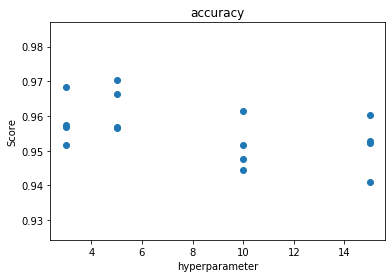

In [13]:
# plot learning curves
pyplot.title('accuracy')
pyplot.xlabel('hyperparameter')
pyplot.ylabel('Score')
pyplot.scatter(results['param_hidden_layers'],results['mean_test_score'] )
pyplot.show()